In [64]:
import sys, os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random


In [65]:
sys.path.append(
    "/Users/wiegerscheurer/repos/physicspred"
)  # To enable importing from repository folders


from functions.utilities import ordinal_sample, bellshape_sample
from functions.physics import _rotate_90, _dir_to_vec, _vec_to_dir, _flip_dir
from functions.utilities import check_balance, create_balanced_trial_design, build_design_matrix, determine_sequence
from functions.analysis import (get_precision, 
                                get_data, 
                                get_false_negatives,
                                get_false_positives,
                                get_true_positives,
                                get_true_negatives,
                                filter_condition,
                                get_f1_score, 
                                get_rt, 
                                get_accuracy,
                                get_hit_rate,)


In [66]:
1200 / 60

20.0

### Tsjebyshev

In [ ]:
# all_sub_names = ["wolpert", "wunger","scheur", "hendrik", "willem", "ikzelf", "melvin", "paulo", "yifan", "ann", "qifei", "mingyao", "bilge", "yanni", "eva"]
# all_sub_names = ["002634"]
sub_stack = pd.DataFrame()

# for sub_idx, sub in enumerate(all_sub_names):
    this_sub = get_data(subject=f"sub-{sub}", task="ball_hue")
    sub_stack = pd.concat([sub_stack, this_sub])
    
sub_stack.reset_index(inplace=True, drop=True)
# sub_stack

In [8]:
sub_stack = pd.DataFrame()


sub_stack = get_data(subject=None, task="ball_hue")
    # sub_stack = pd.concat([sub_stack, this_sub])

# sub_stack.reset_index(inplace=True, drop=True)


In [52]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import seaborn as sns
# from numpy.polynomial.polynomial import polyfit

# def create_psychometric_plots(data, title=None, prob_ylim=None, rt_ylim=None, 
#                               prob_poly_fit=None, rt_poly_fit=None, split_hypotheses=False):
#     """
#     Create two psychometric plots with customizable features.
    
#     Parameters:
#     -----------
#     data : pandas.DataFrame
#         DataFrame containing the columns 'ball_color_change', 'response', and 'rt'
#     title : str, optional
#         Custom title for the overall figure
#     prob_ylim : tuple, optional
#         Custom y-axis range for probability plot (min, max)
#     rt_ylim : tuple, optional
#         Custom y-axis range for reaction time plot (min, max)
#     prob_poly_fit : int or None, optional
#         Degree of polynomial to fit to probability data (None for no fit)
#     rt_poly_fit : int or None, optional
#         Degree of polynomial to fit to reaction time data (None for no fit)
#     split_hypotheses : bool, optional
#         Whether to split the data into four hypotheses using filter_condition
#     """
#     # Figure setup
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
#     plt.tight_layout(pad=4)
    
#     if not split_hypotheses:
#         # Original implementation for a single dataset
#         # Extract unique values of ball_color_change and ensure they are in order
#         color_changes = sorted(data['ball_color_change'].unique())
        
#         # Convert color changes to numeric for polynomial fitting
#         # (necessary if they're stored as strings)
#         x_numeric = np.array([float(x) for x in color_changes])
        
#         # Calculate probability of "lighter" response for each ball_color_change value
#         prob_lighter = []
#         for change in color_changes:
#             subset = data[data['ball_color_change'] == change]
#             prob = (subset['response'] == 'lighter').mean()
#             prob_lighter.append(prob)
        
#         # Calculate mean reaction time for each ball_color_change value
#         mean_rt = []
#         rt_error = []  # for standard error
#         for change in color_changes:
#             subset = data[data['ball_color_change'] == change]
#             mean_rt.append(subset['rt'].mean())
#             rt_error.append(subset['rt'].std() / np.sqrt(len(subset)))
        
#         # Plot 1: Probability of "lighter" response
#         ax1.plot(color_changes, prob_lighter, 'o-', color='blue', markersize=8, label='Data')
        
#         # Add polynomial fit if requested
#         if prob_poly_fit is not None:
#             # Create a more fine-grained x for smooth curve
#             x_fit = np.linspace(min(x_numeric), max(x_numeric), 100)
            
#             # Fit polynomial of specified degree
#             coefs = polyfit(x_numeric, prob_lighter, prob_poly_fit)
#             y_fit = np.polyval(coefs, x_fit)
            
#             # Plot fitted curve
#             ax1.plot(x_fit, y_fit, 'r--', linewidth=2, 
#                      label=f'{prob_poly_fit}-degree polynomial fit')
        
#         # Plot 2: Reaction time
#         ax2.errorbar(color_changes, mean_rt, yerr=rt_error, fmt='o-', color='green', 
#                     markersize=8, capsize=5, label='Data')
        
#         # Add polynomial fit if requested for RT data
#         if rt_poly_fit is not None:
#             # Create a more fine-grained x for smooth curve
#             x_fit = np.linspace(min(x_numeric), max(x_numeric), 100)
            
#             # Fit polynomial of specified degree
#             coefs = polyfit(x_numeric, mean_rt, rt_poly_fit)
#             y_fit = np.polyval(coefs, x_fit)
            
#             # Plot fitted curve
#             ax2.plot(x_fit, y_fit, 'r--', linewidth=2, 
#                      label=f'{rt_poly_fit}-degree polynomial fit')
        
#         # Add labels for number of trials per condition
#         for i, change in enumerate(color_changes):
#             count = len(data[data['ball_color_change'] == change])
#             ax1.annotate(f'n={count}', xy=(change, prob_lighter[i]), 
#                         xytext=(0, 10), textcoords='offset points', 
#                         ha='center', va='bottom', fontsize=8)
    
#     else:
#         # Implementation for split hypotheses
#         # Get data for each hypothesis
#         cc = filter_condition(data, True, True)
#         ci = filter_condition(data, True, False)
#         ic = filter_condition(data, False, True)
#         ii = filter_condition(data, False, False)
        
#         # Define colors and labels for each hypothesis
#         hypotheses = [
#             (cc, 'CC', 'blue'),
#             (ci, 'CI', 'green'),
#             (ic, 'IC', 'red'),
#             (ii, 'II', 'purple')
#         ]
        
#         # Find the common set of color changes across all hypotheses
#         all_changes = set()
#         for hyp_data, _, _ in hypotheses:
#             all_changes.update(hyp_data['ball_color_change'].unique())
#         color_changes = sorted(all_changes)
        
#         # Convert color changes to numeric for polynomial fitting
#         x_numeric = np.array([float(x) for x in color_changes])
        
#         # Plot for each hypothesis
#         for hyp_data, label, color in hypotheses:
#             hyp_color_changes = sorted(hyp_data['ball_color_change'].unique())
#             hyp_x_numeric = np.array([float(x) for x in hyp_color_changes])
            
#             # Skip if no data for this hypothesis
#             if len(hyp_color_changes) == 0:
#                 continue
                
#             # Calculate probability of "lighter" response
#             prob_lighter = []
#             for change in hyp_color_changes:
#                 subset = hyp_data[hyp_data['ball_color_change'] == change]
#                 if len(subset) > 0:
#                     prob = (subset['response'] == 'lighter').mean()
#                     prob_lighter.append(prob)
#                 else:
#                     prob_lighter.append(np.nan)
            
#             # Calculate mean reaction time and error
#             mean_rt = []
#             rt_error = []
#             for change in hyp_color_changes:
#                 subset = hyp_data[hyp_data['ball_color_change'] == change]
#                 if len(subset) > 0:
#                     mean_rt.append(subset['rt'].mean())
#                     rt_error.append(subset['rt'].std() / np.sqrt(len(subset)))
#                 else:
#                     mean_rt.append(np.nan)
#                     rt_error.append(np.nan)
            
#             # Plot probability data
#             ax1.plot(hyp_color_changes, prob_lighter, 'o-', color=color, 
#                     markersize=6, label=f'Hypothesis {label}')
            
#             # Add polynomial fit if requested
#             if prob_poly_fit is not None and len(hyp_color_changes) > prob_poly_fit:
#                 try:
#                     # Create a more fine-grained x for smooth curve
#                     x_fit = np.linspace(min(hyp_x_numeric), max(hyp_x_numeric), 100)
                    
#                     # Fit polynomial of specified degree
#                     valid_indices = ~np.isnan(prob_lighter)
#                     if sum(valid_indices) > prob_poly_fit:
#                         coefs = polyfit(hyp_x_numeric[valid_indices], 
#                                         np.array(prob_lighter)[valid_indices], 
#                                         prob_poly_fit)
#                         y_fit = np.polyval(coefs, x_fit)
                        
#                         # Plot fitted curve
#                         ax1.plot(x_fit, y_fit, '--', color=color, linewidth=1.5, 
#                                 alpha=0.7, label=f'{label} {prob_poly_fit}-deg fit')
#                 except:
#                     # Skip polynomial fitting if there's an error (e.g., not enough data points)
#                     pass
            
#             # Plot reaction time data
#             ax2.errorbar(hyp_color_changes, mean_rt, yerr=rt_error, fmt='o-', 
#                         color=color, markersize=6, capsize=4, 
#                         label=f'Hypothesis {label}')
            
#             # Add polynomial fit if requested for RT data
#             if rt_poly_fit is not None and len(hyp_color_changes) > rt_poly_fit:
#                 try:
#                     # Create a more fine-grained x for smooth curve
#                     x_fit = np.linspace(min(hyp_x_numeric), max(hyp_x_numeric), 100)
                    
#                     # Fit polynomial of specified degree
#                     valid_indices = ~np.isnan(mean_rt)
#                     if sum(valid_indices) > rt_poly_fit:
#                         coefs = polyfit(hyp_x_numeric[valid_indices], 
#                                         np.array(mean_rt)[valid_indices], 
#                                         rt_poly_fit)
#                         y_fit = np.polyval(coefs, x_fit)
                        
#                         # Plot fitted curve
#                         ax2.plot(x_fit, y_fit, '--', color=color, linewidth=1.5,
#                                 alpha=0.7, label=f'{label} {rt_poly_fit}-deg fit')
#                 except:
#                     # Skip polynomial fitting if there's an error
#                     pass
    
#     # Common settings for both plots
#     ax1.set_xlabel('Ball Color Change')
#     ax1.set_ylabel('Probability of "Lighter" Response')
#     ax1.set_title('Psychometric Function: Probability of "Lighter" Response')
    
#     # Set custom y-axis limits if provided
#     if prob_ylim:
#         ax1.set_ylim(prob_ylim)
#     else:
#         ax1.set_ylim(0, 1)  # Default range for probability
    
#     ax1.grid(True, alpha=0.3)
#     ax1.legend(loc='best')
    
#     # Add horizontal line at 0.5 probability for reference
#     ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
    
#     ax2.set_xlabel('Ball Color Change')
#     ax2.set_ylabel('Reaction Time (s)')
#     ax2.set_title('Reaction Time by Ball Color Change')
    
#     # Set custom y-axis limits if provided
#     if rt_ylim:
#         ax2.set_ylim(rt_ylim)
    
#     ax2.grid(True, alpha=0.3)
#     ax2.legend(loc='best')
    
#     # Set custom title if provided
#     if title:
#         plt.suptitle(title, fontsize=16)
#     else:
#         plt.suptitle('Psychometric Analysis of Ball Hue Task', fontsize=16)
    
#     plt.savefig('psychometric_plots.png', dpi=300, bbox_inches='tight')
#     plt.show()
    
#     return fig


In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.polynomial.polynomial import polyfit, polyval

def create_psychometric_plots(data, title=None, prob_ylim=None, rt_ylim=None, 
                              prob_poly_fit=None, rt_poly_fit=None, split_hypotheses=False,
                              save_fig:bool=False):
    """
    Create two psychometric plots with customizable features.
    
    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing the columns 'ball_color_change', 'response', and 'rt'
    title : str, optional
        Custom title for the overall figure
    prob_ylim : tuple, optional
        Custom y-axis range for probability plot (min, max)
    rt_ylim : tuple, optional
        Custom y-axis range for reaction time plot (min, max)
    prob_poly_fit : int or None, optional
        Degree of polynomial to fit to probability data (None for no fit)
    rt_poly_fit : int or None, optional
        Degree of polynomial to fit to reaction time data (None for no fit)
    split_hypotheses : bool, optional
        Whether to split the data into four hypotheses using filter_condition
    """
    # Ensure polynomial degrees are integers
    if prob_poly_fit is not None:
        prob_poly_fit = int(prob_poly_fit)
    if rt_poly_fit is not None:
        rt_poly_fit = int(rt_poly_fit)
    
    # Figure setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    plt.tight_layout(pad=4)
    
    if not split_hypotheses:
        # Original implementation for a single dataset
        # Extract unique values of ball_color_change and ensure they are in order
        color_changes = sorted(data['ball_color_change'].unique())
        
        # Convert color changes to numeric for polynomial fitting
        # (necessary if they're stored as strings)
        x_numeric = np.array([float(x) for x in color_changes])
        
        # Calculate probability of "lighter" response for each ball_color_change value
        prob_lighter = []
        for change in color_changes:
            subset = data[data['ball_color_change'] == change]
            prob = (subset['response'] == 'lighter').mean()
            prob_lighter.append(prob)
        
        # Calculate mean reaction time for each ball_color_change value
        mean_rt = []
        rt_error = []  # for standard error
        for change in color_changes:
            subset = data[data['ball_color_change'] == change]
            mean_rt.append(subset['rt'].mean())
            rt_error.append(subset['rt'].std() / np.sqrt(len(subset)))
        
        # Plot 1: Probability of "lighter" response
        ax1.plot(color_changes, prob_lighter, 'o-', color='blue', markersize=8, label='Data')
        
        # Add polynomial fit if requested
        if prob_poly_fit is not None and len(color_changes) > prob_poly_fit:
            try:
                # Fit polynomial of specified degree
                coefs = polyfit(x_numeric, prob_lighter, prob_poly_fit)
                
                # Create a more fine-grained x for smooth curve
                x_fit = np.linspace(min(x_numeric), max(x_numeric), 100)
                y_fit = polyval(x_fit, coefs)  # Using polyval from numpy.polynomial.polynomial
                
                # Plot fitted curve
                ax1.plot(x_fit, y_fit, 'r--', linewidth=2, 
                         label=f'{prob_poly_fit}-degree polynomial fit')
            except Exception as e:
                print(f"Error fitting probability polynomial: {e}")
        
        # Plot 2: Reaction time
        ax2.errorbar(color_changes, mean_rt, yerr=rt_error, fmt='o-', color='green', 
                    markersize=8, capsize=5, label='Data')
        
        # Add polynomial fit if requested for RT data
        if rt_poly_fit is not None and len(color_changes) > rt_poly_fit:
            try:
                # Fit polynomial of specified degree
                coefs = polyfit(x_numeric, mean_rt, rt_poly_fit)
                
                # Create a more fine-grained x for smooth curve
                x_fit = np.linspace(min(x_numeric), max(x_numeric), 100)
                y_fit = polyval(x_fit, coefs)  # FIXED: Order of arguments
                
                # Plot fitted curve
                ax2.plot(x_fit, y_fit, 'r--', linewidth=2, 
                         label=f'{rt_poly_fit}-degree polynomial fit')
            except Exception as e:
                print(f"Error fitting RT polynomial: {e}")
        
        # Add labels for number of trials per condition
        for i, change in enumerate(color_changes):
            count = len(data[data['ball_color_change'] == change])
            ax1.annotate(f'n={count}', xy=(change, prob_lighter[i]), 
                        xytext=(0, 10), textcoords='offset points', 
                        ha='center', va='bottom', fontsize=8)
    
    else:
        # Implementation for split hypotheses
                    
        # Get data for each hypothesis
        cc = filter_condition(data, True, True)
        ci = filter_condition(data, True, False)
        ic = filter_condition(data, False, True)
        ii = filter_condition(data, False, False)
        
        # Define colors and labels for each hypothesis
        hypotheses = [
            (cc, 'CC', 'blue'),
            (ci, 'CI', 'green'),
            (ic, 'IC', 'red'),
            (ii, 'II', 'purple')
        ]
        
        # Find the common set of color changes across all hypotheses
        all_changes = set()
        for hyp_data, _, _ in hypotheses:
            all_changes.update(hyp_data['ball_color_change'].unique())
        color_changes = sorted(all_changes)
        
        # Plot for each hypothesis
        for hyp_data, label, color in hypotheses:
            hyp_color_changes = sorted(hyp_data['ball_color_change'].unique())
            
            # Skip if no data for this hypothesis
            if len(hyp_color_changes) == 0:
                continue
                
            # Convert to numeric values for polynomial fitting
            hyp_x_numeric = np.array([float(x) for x in hyp_color_changes])
            
            # Calculate probability of "lighter" response
            prob_lighter = []
            for change in hyp_color_changes:
                subset = hyp_data[hyp_data['ball_color_change'] == change]
                if len(subset) > 0:
                    prob = (subset['response'] == 'lighter').mean()
                    prob_lighter.append(prob)
                else:
                    prob_lighter.append(np.nan)
            
            # Calculate mean reaction time and error
            mean_rt = []
            rt_error = []
            for change in hyp_color_changes:
                subset = hyp_data[hyp_data['ball_color_change'] == change]
                if len(subset) > 0:
                    mean_rt.append(subset['rt'].mean())
                    rt_error.append(subset['rt'].std() / np.sqrt(len(subset)))
                else:
                    mean_rt.append(np.nan)
                    rt_error.append(np.nan)
            
            # Convert lists to numpy arrays for easier manipulation
            prob_lighter_array = np.array(prob_lighter)
            mean_rt_array = np.array(mean_rt)
            
            # Plot probability data
            ax1.plot(hyp_color_changes, prob_lighter, 'o-', color=color, 
                    markersize=6, label=f'Hypothesis {label}')
            
            # Add polynomial fit if requested
            if prob_poly_fit is not None:
                # Check if we have enough valid data points for fitting
                valid_indices = ~np.isnan(prob_lighter_array)
                num_valid = np.sum(valid_indices)
                
                if num_valid > prob_poly_fit:
                    try:
                        # Extract valid x and y values
                        valid_x = hyp_x_numeric[valid_indices]
                        valid_y = prob_lighter_array[valid_indices]
                        
                        # Fit polynomial of specified degree
                        coefs = polyfit(valid_x, valid_y, int(prob_poly_fit))
                        
                        # Create a more fine-grained x for smooth curve within the VALID range
                        x_fit = np.linspace(min(valid_x), max(valid_x), 100)
                        
                        # FIXED: Order of arguments in polyval
                        y_fit = polyval(x_fit, coefs)
                        
                        # Plot fitted curve
                        ax1.plot(x_fit, y_fit, '--', color=color, linewidth=1.5, 
                                alpha=0.7, label=f'{label} {prob_poly_fit}-deg fit')
                    except Exception as e:
                        print(f"Error fitting probability polynomial for {label}: {e}")
                        print(f"Debug - valid_x shape: {valid_x.shape}, valid_y shape: {valid_y.shape}")
            
            # Plot reaction time data
            ax2.errorbar(hyp_color_changes, mean_rt, yerr=rt_error, fmt='o-', 
                        color=color, markersize=6, capsize=4, 
                        label=f'Hypothesis {label}')
            
            # Add polynomial fit if requested for RT data
            if rt_poly_fit is not None:
                # Check if we have enough valid data points for fitting
                valid_indices = ~np.isnan(mean_rt_array)
                num_valid = np.sum(valid_indices)
                
                if num_valid > rt_poly_fit:
                    try:
                        # Extract valid x and y values
                        valid_x = hyp_x_numeric[valid_indices]
                        valid_y = mean_rt_array[valid_indices]
                        
                        # Fit polynomial of specified degree
                        coefs = polyfit(valid_x, valid_y, int(rt_poly_fit))
                        
                        # Create a more fine-grained x for smooth curve within the VALID range
                        x_fit = np.linspace(min(valid_x), max(valid_x), 100)
                        
                        # FIXED: Order of arguments in polyval
                        y_fit = polyval(x_fit, coefs)
                        
                        # Plot fitted curve
                        ax2.plot(x_fit, y_fit, '--', color=color, linewidth=1.5,
                                alpha=0.7, label=f'{label} {rt_poly_fit}-deg fit')
                    except Exception as e:
                        print(f"Error fitting RT polynomial for {label}: {e}")
                        print(f"Debug - valid_x shape: {valid_x.shape}, valid_y shape: {valid_y.shape}")
    
    # Common settings for both plots
    ax1.set_xlabel('Ball Color Change')
    ax1.set_ylabel('Probability of "Lighter" Response')
    ax1.set_title('Psychometric Function: Probability of "Lighter" Response')
    
    # Set custom y-axis limits if provided
    if prob_ylim:
        ax1.set_ylim(prob_ylim)
    else:
        ax1.set_ylim(0, 1)  # Default range for probability
    
    ax1.grid(True, alpha=0.3)
    ax1.legend(loc='best')
    
    # Add horizontal line at 0.5 probability for reference
    ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
    
    ax2.set_xlabel('Ball Color Change')
    ax2.set_ylabel('Reaction Time (s)')
    ax2.set_title('Reaction Time by Ball Color Change')
    
    # Set custom y-axis limits if provided
    if rt_ylim:
        ax2.set_ylim(rt_ylim)
    
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='best')
    
    # Set custom title if provided
    if title:
        plt.suptitle(title, fontsize=16)
    else:
        plt.suptitle('Psychometric Analysis of Ball Hue Task', fontsize=16)
    
    if save_fig:
        plt.savefig('psychometric_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return fig

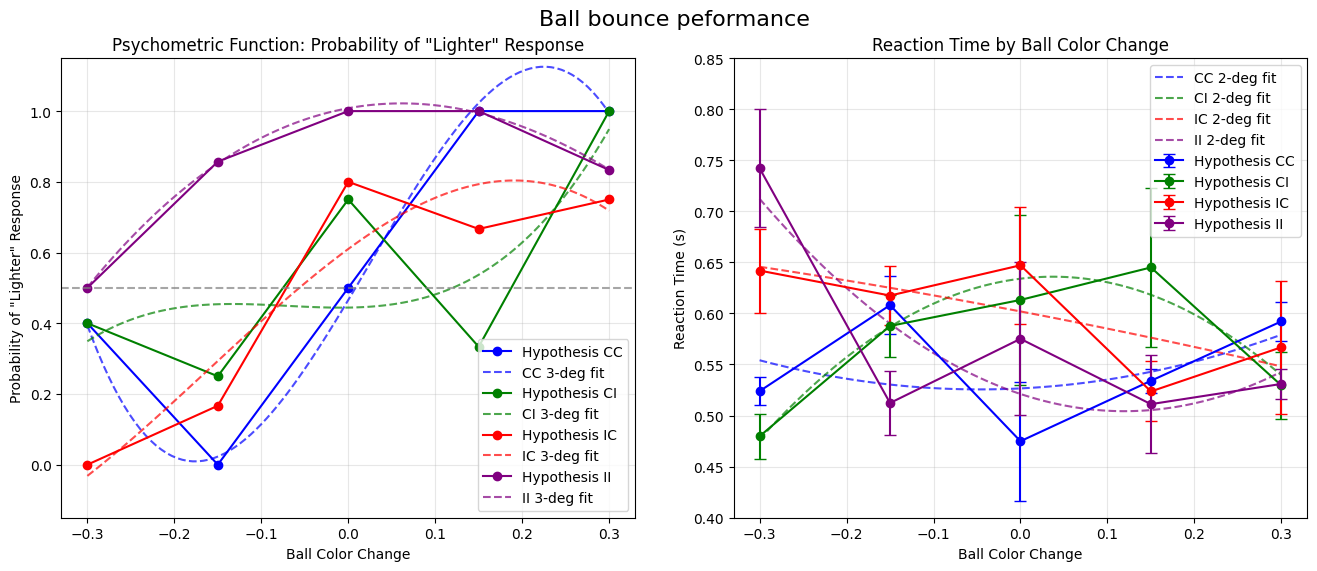

In [115]:

testdf = get_data(subject=None, task="ball_hue")
# ii = filter_condition(testdf, False, False)

# testdf = get_data(subject="incomplete/sub-927320", task="ball_hue")
_ = create_psychometric_plots(data=testdf, 
                              title="Ball bounce peformance", 
                              prob_ylim=(-.15, 1.15), 
                              rt_ylim=(0.4, .85), 
                              prob_poly_fit=3, 
                              rt_poly_fit=2,
                              split_hypotheses=True)

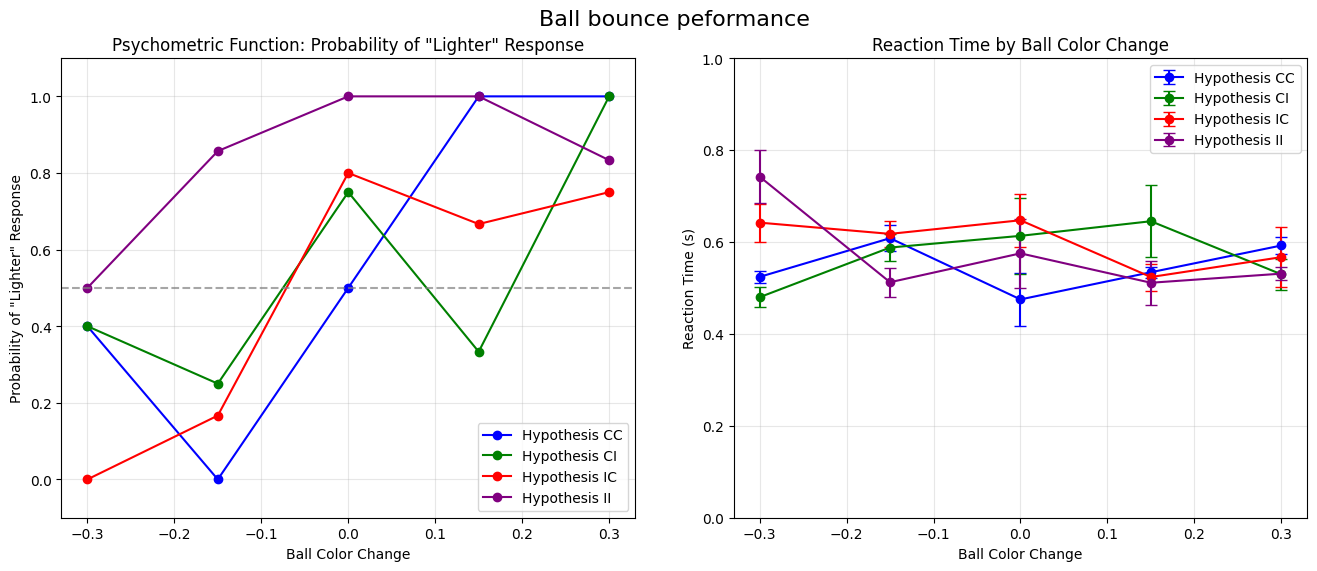

In [73]:

testdf = get_data(subject=None, task="ball_hue")
# testdf = get_data(subject="sub-927320", task="ball_hue")
_ = create_psychometric_plots(data=testdf, 
                              title="Ball bounce peformance", 
                              prob_ylim=(-.1, 1.1), 
                              rt_ylim=(0, 1), 
                              prob_poly_fit=None, 
                              rt_poly_fit=None,
                              split_hypotheses=True)

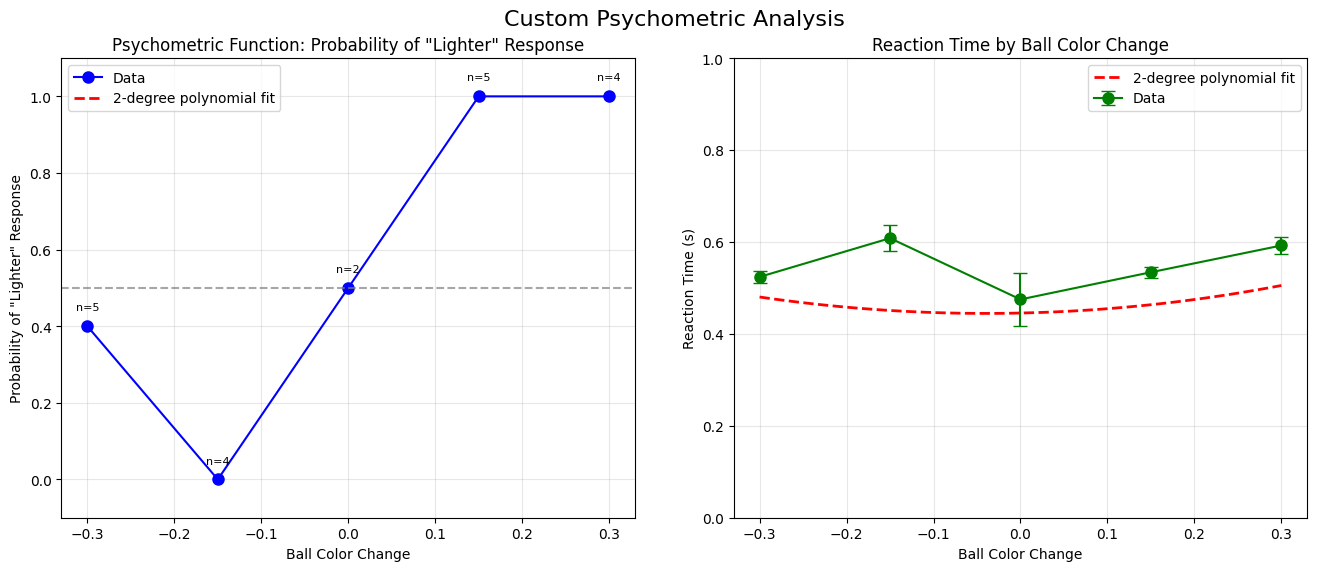

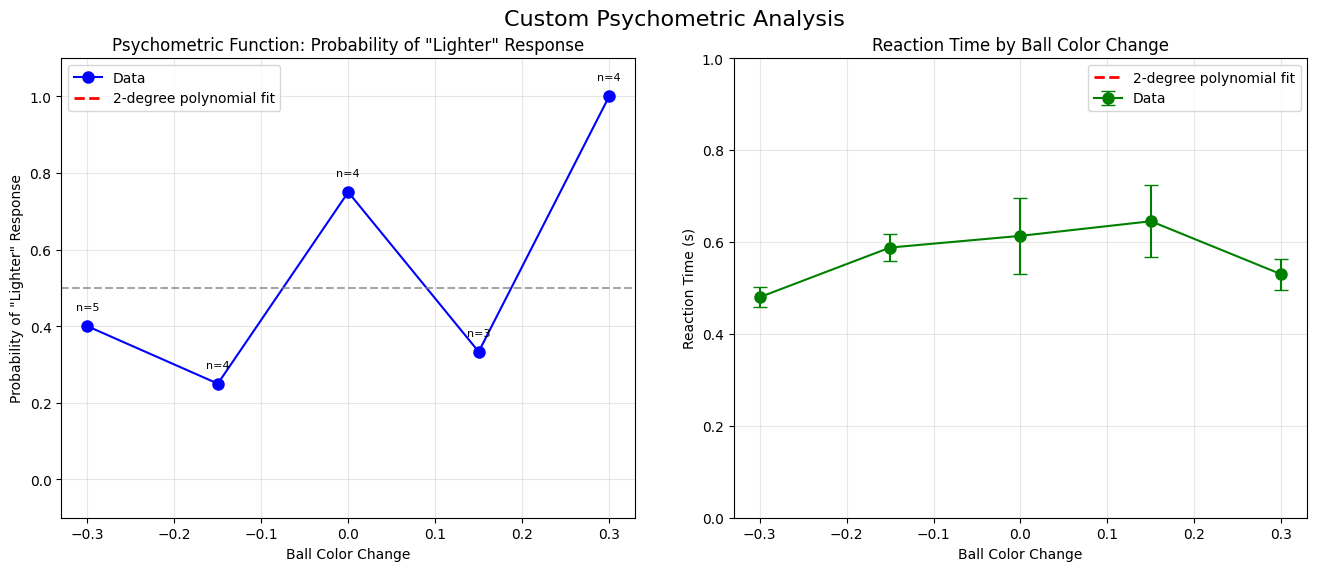

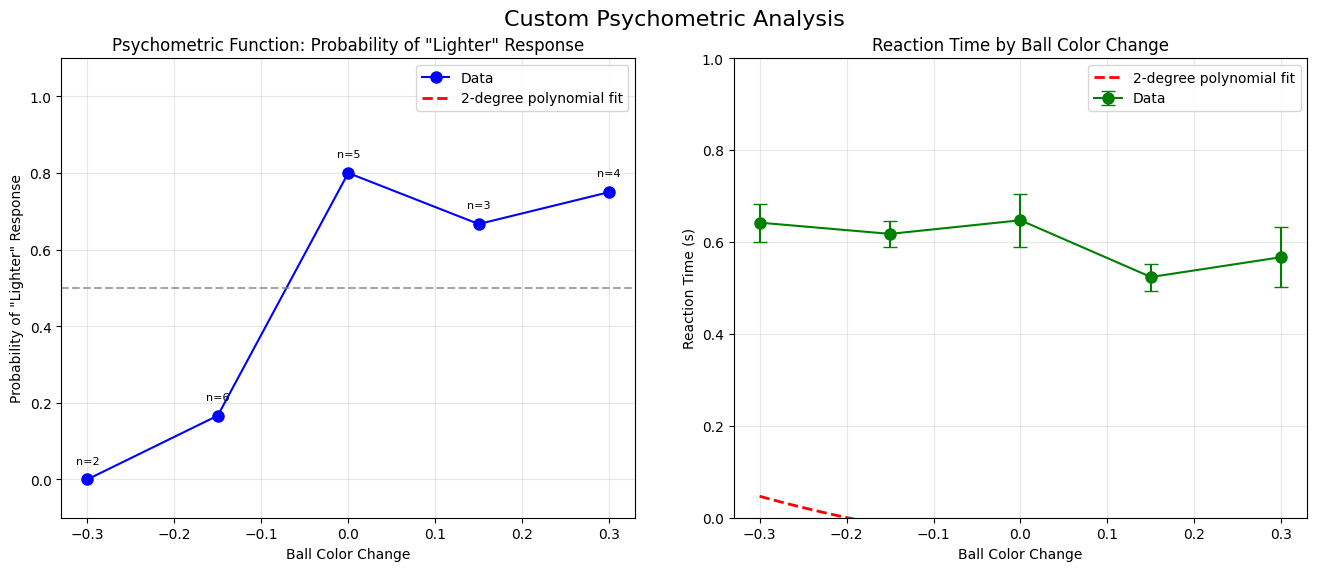

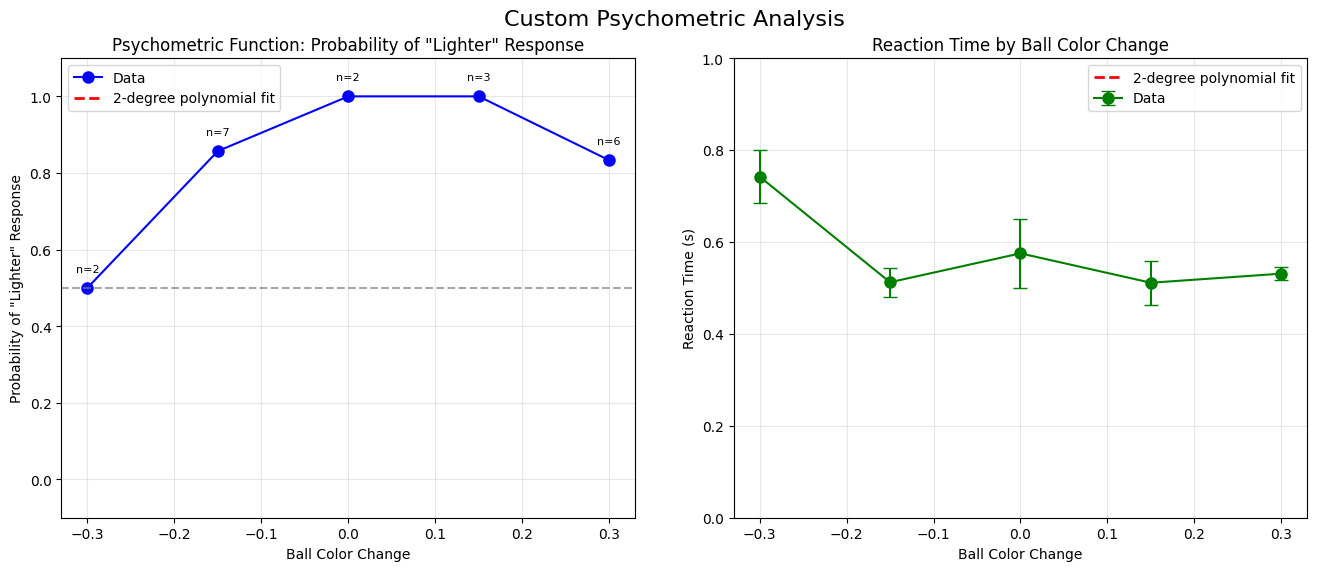

In [56]:

cc = filter_condition(testdf, True, True)
ci = filter_condition(testdf, True, False)
ic = filter_condition(testdf, False, True)
ii = filter_condition(testdf, False, False)

for df in [cc, ci, ic, ii]:
    _ = create_psychometric_plots(data=df, 
                                  title="Custom Psychometric Analysis", 
                                  prob_ylim=(-.1, 1.1), 
                                  rt_ylim=(0, 1), 
                                  prob_poly_fit=2, 
                                  rt_poly_fit=2)

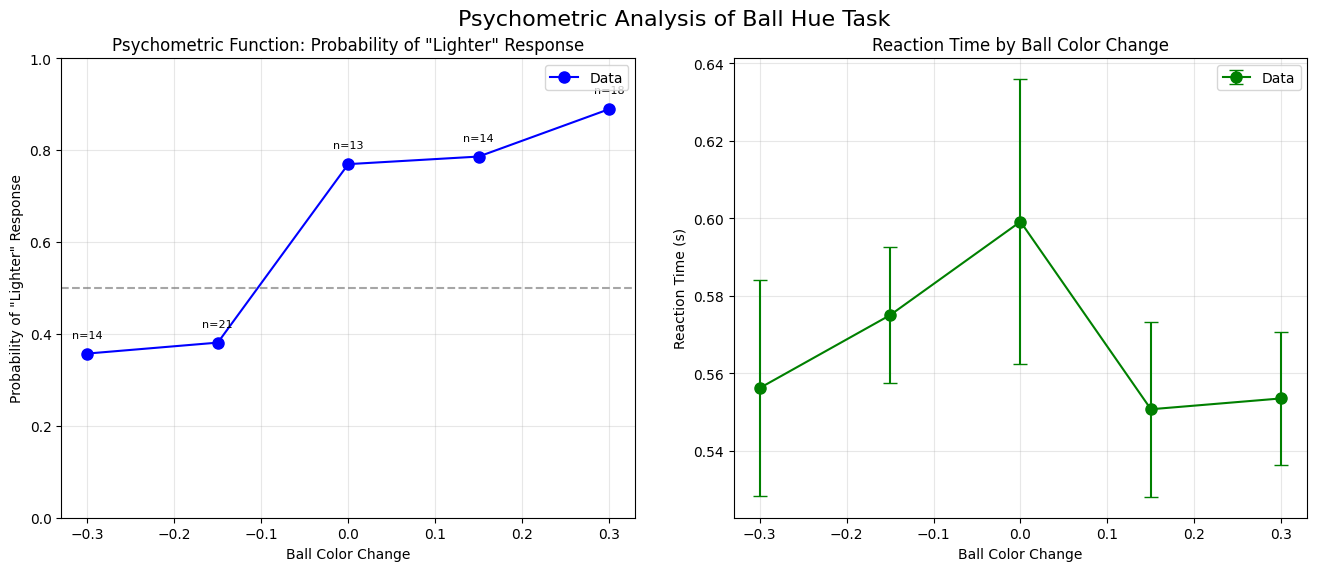

In [78]:
# Example usage:
# create_psychometric_plots(testdf)

# If you want to call this directly with your existing dataframe:
# If your dataframe is called 'testdf' and was loaded with:
# Then just call:



_ = create_psychometric_plots(testdf)

In [9]:
print(sub_stack['response'].unique())
estimator=lambda x: x.mean()
estimator=lambda x: (x.str.lower().str.strip() == 'lighter').mean()


['lighter' 'darker' 'space']


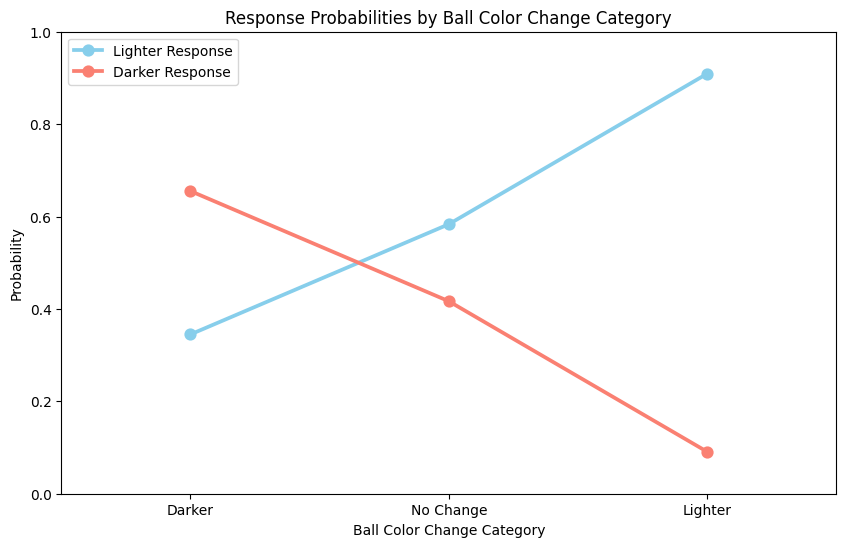

  change_category  lighter_prob  darker_prob
0          Darker      0.344828     0.655172
2       No Change      0.583333     0.416667
1         Lighter      0.909091     0.090909


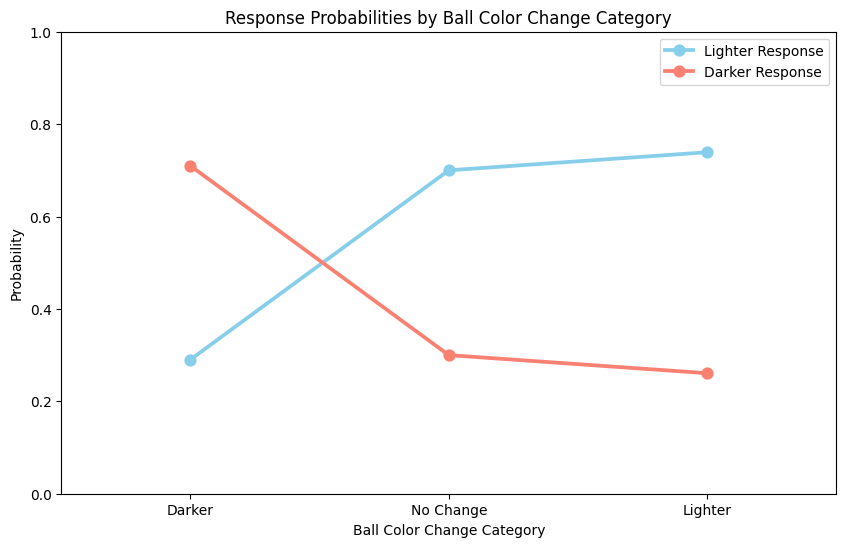

  change_category  lighter_prob  darker_prob
0          Darker      0.290323     0.709677
2       No Change      0.700000     0.300000
1         Lighter      0.739130     0.260870


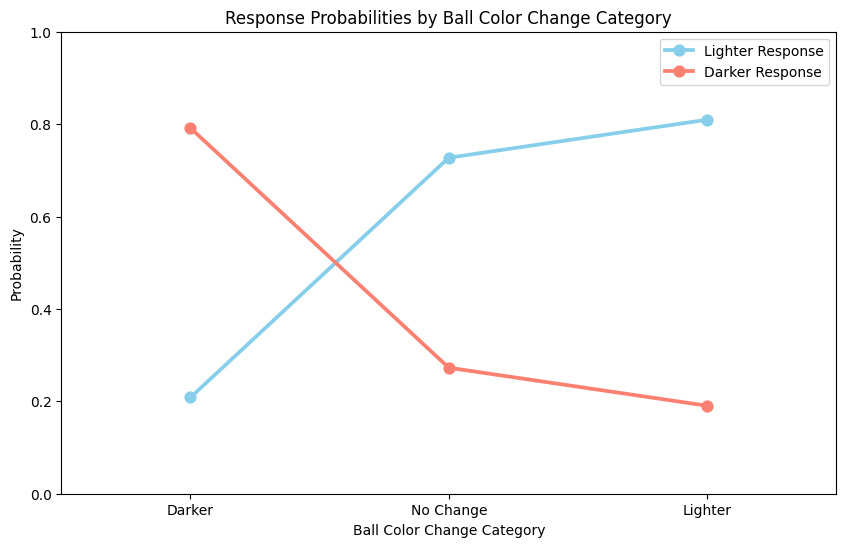

  change_category  lighter_prob  darker_prob
0          Darker      0.208333     0.791667
2       No Change      0.727273     0.272727
1         Lighter      0.809524     0.190476


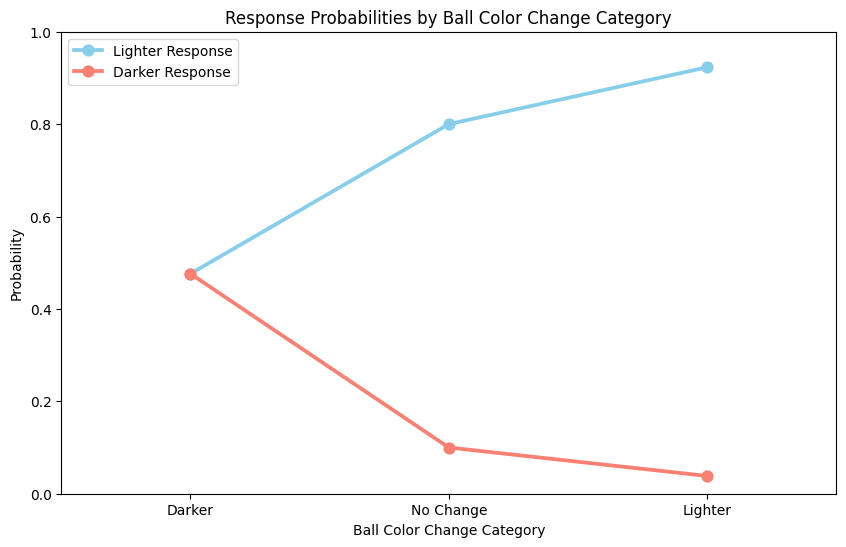

  change_category  lighter_prob  darker_prob
0          Darker      0.476190     0.476190
2       No Change      0.800000     0.100000
1         Lighter      0.923077     0.038462


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
def simple_probplot(data):
    # First, let's create a function to categorize the ball_color_change values
    def categorize_change(value):
        if value < 0:
            return "Darker"
        elif value > 0:
            return "Lighter"
        else:
            return "No Change"

    # Apply this categorization to our data
    data['change_category'] = data['ball_color_change'].apply(categorize_change)

    # Filter out NaN responses
    filtered_data = data.dropna(subset=['response'])

    # Calculate probabilities
    prob_df = filtered_data.groupby('change_category')['response'].agg(
        lighter_prob = lambda x: np.mean(x == "lighter"),
        darker_prob = lambda x: np.mean(x == "darker")
    ).reset_index()

    # Sort the categories in a logical order
    category_order = ["Darker", "No Change", "Lighter"]
    prob_df['change_category'] = pd.Categorical(prob_df['change_category'], categories=category_order, ordered=True)
    prob_df = prob_df.sort_values('change_category')

    # Plot
    plt.figure(figsize=(10, 6))
    sns.pointplot(
        x='change_category',
        y='lighter_prob',
        data=prob_df,
        color='skyblue',
        label='Lighter Response'
    )
    sns.pointplot(
        x='change_category',
        y='darker_prob',
        data=prob_df,
        color='salmon',
        label='Darker Response'
    )
    plt.title('Response Probabilities by Ball Color Change Category')
    plt.xlabel('Ball Color Change Category')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

    # Print the probability dataframe for reference
    print(prob_df)


cc = filter_condition(testdf, True, True)
ci = filter_condition(testdf, True, False)
ic = filter_condition(testdf, False, True)
ii = filter_condition(testdf, False, False)

for df in [cc, ci, ic, ii]:
    simple_probplot(df)

/var/folders/3n/yy1xjnlj5zd3nt4r1202183h0000gn/T/ipykernel_32284/1497705146.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(x='ball_color_change', y='response', data=testdf,
/var/folders/3n/yy1xjnlj5zd3nt4r1202183h0000gn/T/ipykernel_32284/1497705146.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  sns.pointplot(x='ball_color_change', y='response', data=testdf,


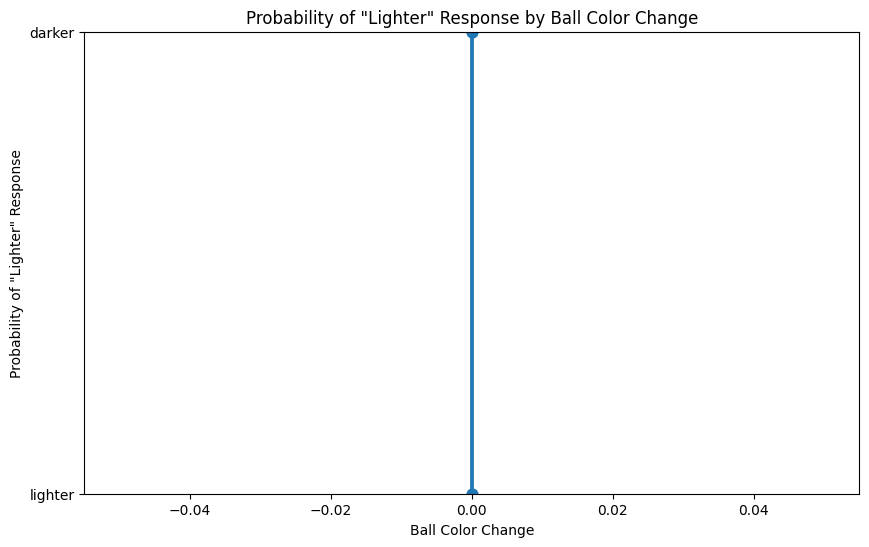

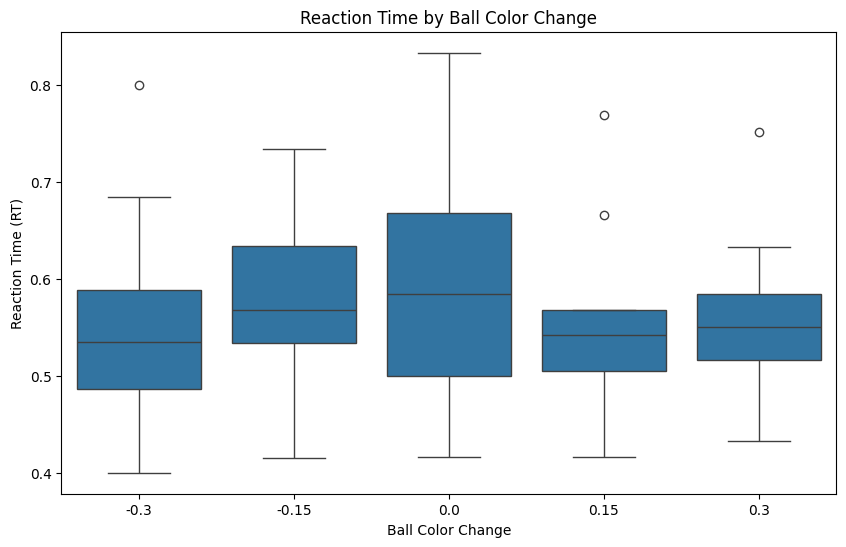

In [54]:
# Plot psychometric curve of the chance

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming testdf is already loaded with your data

# Plot 1: Probability of "lighter" response
plt.figure(figsize=(10, 6))
sns.pointplot(x='ball_color_change', y='response', data=testdf, 
              estimator=lambda x: (x == 'darker').mean(),
              ci=95, join=True)
plt.title('Probability of "Lighter" Response by Ball Color Change')
plt.xlabel('Ball Color Change')
plt.ylabel('Probability of "Lighter" Response')
plt.ylim(0, 1)
plt.show()

# Plot 2: Reaction Time by Ball Color Change
plt.figure(figsize=(10, 6))
sns.boxplot(x='ball_color_change', y='rt', data=testdf)
plt.title('Reaction Time by Ball Color Change')
plt.xlabel('Ball Color Change')
plt.ylabel('Reaction Time (RT)')
plt.show()
